In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
style.use('https://gunerilhan.github.io/img/fivethirtyeight-modified.mplstyle')
from tabulate import tabulate

In [2]:
colors = {0:['#264653','#219D8F','#E9C46A','#F4A261','#E76F51'],
  1:['#003049','#D62828','#F77F00','#FCBF49','#EAE2B7'],
  2:['#F72585','#7209B7','#3A0CA3','#4361EE','#4CC9F0'],
  3: ['#165aa7','#cb495c','#bb60d5','#f47915','#06ab54','#002070','#b27d12','#007030']}

In [3]:
# Read in Madison Project Database legend, so that we know which variables to use
df_legend = pd.read_excel('./mpd2018.xlsx',sheet_name='Legend')
# Rename columns
df_legend.rename(columns={'Maddison Project Database (MPD) 2018':'Variable name','Unnamed: 1':'Definition'},
                 inplace=True)
df_legend.dropna(inplace=True)
# Create a dictionary of var names and definitions
df_legend = dict(zip(df_legend['Variable name'],df_legend['Definition']))

In [4]:
# here is the legend
df_legend

{'Full data': 'Data in  single table',
 'countrycode': '3-letter ISO country code',
 'country': 'Country name',
 'year': 'Year',
 'cgdppc': 'Real GDP per capita in 2011US$, multiple benchmarks (suitable for cross-country income comparisons)',
 'rgdpnapc': 'Real GDP per capita in 2011US$, 2011 benchmark (suitable for cross-country growth comparisons)',
 'pop': 'Population, mid-year (thousands)',
 'i_cig': '0/1/2: observation is extrapolated (0), benchmark (1), or interpolated (2)',
 'i_bm': 'For benchmark observations: 1: ICP PPP estimates, 2: Historical income benchmarks, 3: Real wages and urbanization, 4: Multiple of subsistence, 5: Braithwaite (1968) PPPs',
 'Partial countries': 'Data for selected sub-national units with long time series'}

In [5]:
# Read in the data
df = pd.read_excel('./mpd2018.xlsx',sheet_name='Full data')

In [6]:
# Here is how the data looks like, first 5 entries
df.head()

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951,2422.0,2422.0,8284.0,Extrapolated,NaN


In [7]:
# A function to plot graphs
def plot_graphs(df2,country_list,filename,source,loc_all):
    color_list = dict(zip(country_list,colors[:len(country_list)]))
    fig,ax = plt.subplots()
    sns.lineplot(x='year',y='cgdppc',hue='countrycode',linewidth=2,
                 palette=color_list,legend=False,data=df2)
    for i,country in enumerate(country_list):
        df3 = df2[df2.countrycode==country]
        label = df3.country.unique()[0]
        loc_ = (2020,df3[df3.year==2016].cgdppc) if label != 'Japan' else (2020,df3[df3.year==2016].cgdppc-1000)
        ax.annotate(label,loc_,color=color_list[country])
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP per capita');
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.text(loc_all[0],loc_all[1],source)
    plt.savefig(filename,bbox_inches='tight')

In [8]:
# Penn World Tables, version 9.1
# Accessed from https://www.rug.nl/ggdc/productivity/pwt/?lang=en
# Read in legend
pwt_legend = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt91.xlsx',sheet_name='Legend')
# Drop entries with missing data
pwt_legend.dropna(inplace=True)
# Create a dictionary of variable descriptions
pwt_legend = dict(zip(pwt_legend['Variable name'],pwt_legend['Variable definition']))

In [9]:
# Here is the legend
pwt_legend

{'countrycode': '3-letter ISO country code',
 'country': 'Country name',
 'currency_unit': 'Currency unit',
 'year': 'Year',
 'rgdpe': 'Expenditure-side real GDP at chained PPPs (in mil. 2011US$)',
 'rgdpo': 'Output-side real GDP at chained PPPs (in mil. 2011US$)',
 'pop': 'Population (in millions)',
 'emp': 'Number of persons engaged (in millions)',
 'avh': 'Average annual hours worked by persons engaged',
 'hc': 'Human capital index, based on years of schooling and returns to education; see Human capital in PWT9.',
 'ccon': 'Real consumption of households and government, at current PPPs (in mil. 2011US$)',
 'cda': 'Real domestic absorption, (real consumption plus investment), at current PPPs (in mil. 2011US$)',
 'cgdpe': 'Expenditure-side real GDP at current PPPs (in mil. 2011US$)',
 'cgdpo': 'Output-side real GDP at current PPPs (in mil. 2011US$)',
 'cn': 'Capital stock at current PPPs (in mil. 2011US$)',
 'ck': 'Capital services levels at current PPPs (USA=1)',
 'ctfp': 'TFP level 

In [10]:
# Read in the data
pwt = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt91.xlsx',sheet_name='Data')

In [11]:
# Here is how pwt data looks like, last 5 entries
pwt.tail()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
12371,ZWE,Zimbabwe,US Dollar,2013,28086.937500,28329.810547,15.054506,7.914061,NaN,2.504635,...,0.169638,-0.426188,0.090225,0.577488,0.582022,0.448409,0.723247,0.632360,0.383488,0.704313
12372,ZWE,Zimbabwe,US Dollar,2014,29217.554688,29355.759766,15.411675,8.222112,NaN,2.550258,...,0.141791,-0.340442,0.051500,0.600760,0.557172,0.392895,0.724510,0.628352,0.349735,0.704991
12373,ZWE,Zimbabwe,US Dollar,2015,30091.923828,29150.750000,15.777451,8.530669,NaN,2.584653,...,0.137558,-0.354298,-0.023353,0.622927,0.580814,0.343926,0.654940,0.564430,0.348472,0.713156
12374,ZWE,Zimbabwe,US Dollar,2016,30974.292969,29420.449219,16.150362,8.839398,NaN,2.616257,...,0.141248,-0.310446,0.003050,0.640176,0.599462,0.337853,0.657060,0.550084,0.346553,0.718671
12375,ZWE,Zimbabwe,US Dollar,2017,32693.474609,30940.816406,16.529903,9.181251,NaN,2.648248,...,0.141799,-0.299539,0.019133,0.647136,0.726222,0.340680,0.645338,0.539529,0.412392,0.755215


In [12]:
# Merge madison data with pwt data, keep only 'countrycode','year','emp' from pwt
df=df.merge(pwt[['countrycode','year','emp']],on=['countrycode','year'],how='left')

In [13]:
# Sort the dataset on 'countrycode','year'
df.sort_values(['countrycode','year'],inplace=True)

In [14]:
# We will calculate GDP per worker values using 'pop' and 'emp'
df_legend['pop'],pwt_legend['emp']

('Population, mid-year (thousands)', 'Number of persons engaged (in millions)')

In [15]:
# Convert population into millions
df['pop'] = df['pop']/1000

In [16]:
# Calculate employment to population ratio as percentage
df['E/pop'] = df['emp']/df['pop']*100

In [17]:
# The variable we will use for calculating growth rates is 'rgdpnapc'
df_legend['rgdpnapc']

'Real GDP per capita in 2011US$, 2011 benchmark (suitable for cross-country growth comparisons)'

Calculate average growth rate of country from year $t$ to year $t+n$. If a variable, say $X_t$, grows at a continuous rate of $g$, i.e. $\frac{dX_t/d_t}{X_t}=g$, then $ X_{t+n} = X_t\exp(g\cdot n) $. Then, using basic algrebra,
$$ g= \log \left( \frac{X_{t+n}}{X_t}\right) \frac{1}{n}.$$ 



In [18]:
# Here we calculate the avarage growth rates of countries from 1960 to 2016 
# using the above formula. 
growth_rates = (df[df.year.isin([1960,2016])].groupby(['countrycode','country']).apply(lambda x:
                100*(np.log(x.iloc[1]['rgdpnapc'])-np.log(x.iloc[0]['rgdpnapc']))/56).reset_index().
                rename(columns={0:'Avg. Growth (1960-2016)'}))

Rule of 72: If a county grows at a rate g, it takes $72/g\cdot100$ years to double its income per capita.

In [19]:
# Now we calculate the number of years it takes for a country to double its income per capita
# using the rule of 72.
growth_rates['Years to double'] = 72/growth_rates['Avg. Growth (1960-2016)']

In [20]:
# Calculate GDP per worker using cgdppc, pop and emp. Remember the definition of cgdppc
df_legend['cgdppc']

'Real GDP per capita in 2011US$, multiple benchmarks (suitable for cross-country income comparisons)'

In [21]:
df['GDP per worker'] = df['cgdppc']*df['pop']/df['emp']

In [22]:
# merge growth rates data with df
df=df.merge(growth_rates,on=['countrycode','country'])

In [23]:
# How the data loooks like
df.head()

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm,emp,E/pop,GDP per worker,Avg. Growth (1960-2016),Years to double
0,AFG,Afghanistan,1820,NaN,NaN,3.280,NaN,NaN,NaN,NaN,NaN,-0.629312,-114.410575
1,AFG,Afghanistan,1870,NaN,NaN,4.207,NaN,NaN,NaN,NaN,NaN,-0.629312,-114.410575
2,AFG,Afghanistan,1913,NaN,NaN,5.730,NaN,NaN,NaN,NaN,NaN,-0.629312,-114.410575
3,AFG,Afghanistan,1950,2392.0,2392.0,8.150,Extrapolated,NaN,NaN,NaN,NaN,-0.629312,-114.410575
4,AFG,Afghanistan,1951,2422.0,2422.0,8.284,Extrapolated,NaN,NaN,NaN,NaN,-0.629312,-114.410575


### Our focus in the long-run trends not on annual fluctuations

In [24]:
import statsmodels.api as sm

In [25]:
# Select United Kingdom
GBR = df[df.countrycode=='GBR'].set_index('year').cgdppc.dropna()

In [26]:
# Filter our trend from fluctuations
cycle, trend = sm.tsa.filters.hpfilter(GBR.loc[1900:],1600)

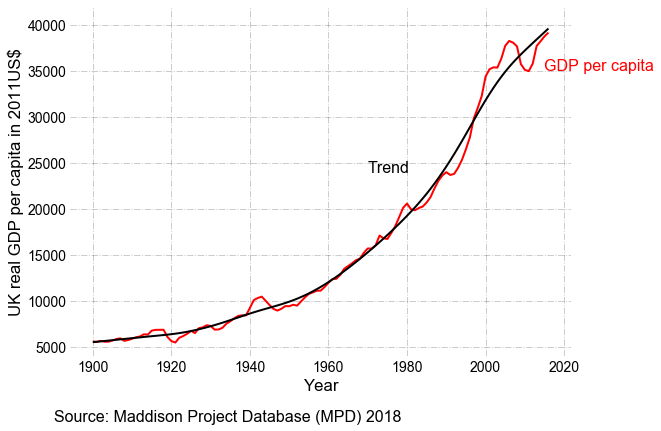

In [27]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(GBR.loc[1900:],'r',linewidth=2,label='GDP per capita')
ax.plot(trend,'k',linewidth=2, label='Trend')
#ax.legend(loc='upper left',frameon=False)
ax.annotate('GDP per capita',(2015,GBR.loc[2010]),color='r',fontsize=16)
ax.annotate('Trend',(1970,GBR.loc[1990]),color='k',fontsize=16)
ax.set_ylim(ymin = 4000,ymax=42000)
ax.set_ylabel('UK real GDP per capita in 2011US$')
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel('Year')
plt.text(1890,-3000,'Source: Maddison Project Database (MPD) 2018',fontsize=16)
plt.savefig('../files/UK-gdp-trend.svg',bbox_inches='tight')

### Fact 1: There is a high variation in per capita income across countries.

In [28]:
# The variable we will use to compare GDP per capitas of countries in 2016 is 'cgdppc'
df_legend['cgdppc']

'Real GDP per capita in 2011US$, multiple benchmarks (suitable for cross-country income comparisons)'

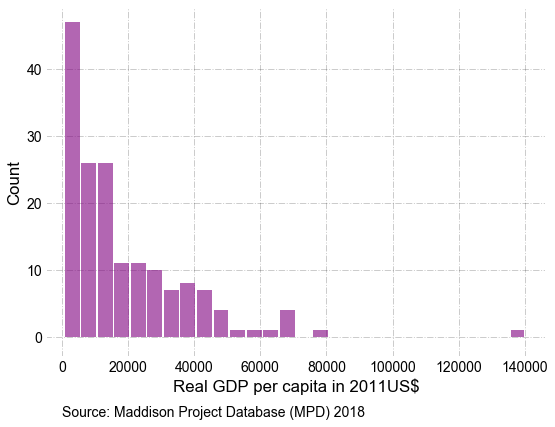

In [29]:
fig,ax=plt.subplots(figsize=(8,6))
df_ = df[df.year==2016]['cgdppc'].dropna()
bins = np.append(np.arange(df_.min(),df_.max(),5000),[df_.max()])
sns.distplot(df_,bins=bins,
             ax=ax,color='purple',hist_kws={"rwidth":0.9,'alpha':0.6},kde=False)
ax.set_xlabel('Real GDP per capita in 2011US$')
ax.set_ylabel('Count')
ax.set_xlim(xmin=-5000)
ax.set_ylim(ymin=-3)
ax.text(-2,-12,'Source: Maddison Project Database (MPD) 2018',fontsize=14)
plt.savefig('../files/income-histogram.svg',bbox_inches='tight')

In [30]:
# Now create descriptive stats about the distribution of income in 2016
desc_ = df[df.year==2016].cgdppc.describe().reset_index()
desc_.columns = ['Statistic','GDP per capita']

In [31]:
desc_ 

,Statistic,GDP per capita
0,count,166.000000
1,mean,18591.698795
2,std,19393.210172
3,min,619.000000
4,25%,3892.250000
5,50%,12134.500000
6,75%,26450.500000
7,max,139783.000000


In [32]:
# Create a markdown table to be posted to my slides
print(tabulate(desc_, tablefmt="pipe", 
               showindex=False,headers="keys"))


| Statistic   |   GDP per capita |
|:------------|-----------------:|
| count       |           166    |
| mean        |         18591.7  |
| std         |         19393.2  |
| min         |           619    |
| 25%         |          3892.25 |
| 50%         |         12134.5  |
| 75%         |         26450.5  |
| max         |        139783    |


In [33]:
# Example countries
country_list = ['USA','IRN','MDA','ETH','GBR','QAT']

In [34]:
# Show the GDP per capita of these countries in 2016
select = (df.countrycode.isin(country_list) & (df.year == 2016))
df[select][['country','cgdppc']].sort_values(['cgdppc'])

,country,cgdppc
5398,Ethiopia,1659.0
10842,Republic of Moldova,5851.0
8643,Iran (Islamic Republic of),15529.0
6708,United Kingdom,39162.0
18959,United States,53015.0
15437,Qatar,139783.0


In [35]:
# What are the GDP per capitas of these countries relative to Ethiopia?
df[select][['country','cgdppc']].set_index('country').sort_values(['cgdppc'])/1659.0

,cgdppc
country,
Ethiopia,1.000000
Republic of Moldova,3.526823
Iran (Islamic Republic of),9.360458
United Kingdom,23.605787
United States,31.955998
Qatar,84.257384


In [36]:
# select high income countries
high_countries = ['USA','JPN','FRA','GBR','ESP']

In [37]:
# create a table of high income countries in year 2016
high_table = df[(df.countrycode.isin(high_countries))&(df.year==2016)]

In [38]:
high_table

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm,emp,E/pop,GDP per worker,Avg. Growth (1960-2016),Years to double
5258,ESP,Spain,2016,31556.0,30110.0,47.024,Extrapolated,NaN,18.699034,39.764873,79356.471829,2.892477,24.892164
6312,FRA,France,2016,38758.0,37124.0,66.957,Extrapolated,NaN,27.622475,41.254051,93949.562339,1.991589,36.152040
6708,GBR,United Kingdom,2016,39162.0,37334.0,65.888,Extrapolated,NaN,31.683855,48.087444,81439.138368,1.814868,39.672300
9486,JPN,Japan,2016,36452.0,37465.0,126.310,Extrapolated,NaN,67.613182,53.529556,68096.959486,3.191344,22.561030
18959,USA,United States,2016,53015.0,53015.0,324.656,Extrapolated,NaN,152.632553,47.013625,112765.183379,1.923189,37.437809


In [39]:
# select only certain variables (columns) and rename column names
high_table = (high_table[['country','year','cgdppc','GDP per worker','E/pop','Avg. Growth (1960-2016)','Years to double']]
             .rename(columns={'cgdppc':'GDP per capita',
                             'country':'Country',
                             'year':'Year'}).set_index(['Country','Year']))

In [40]:
high_table.round(decimals=1)

,,GDP per capita,GDP per worker,E/pop,Avg. Growth (1960-2016),Years to double
Country,Year,,,,,
Spain,2016,31556.0,79356.5,39.8,2.9,24.9
France,2016,38758.0,93949.6,41.3,2.0,36.2
United Kingdom,2016,39162.0,81439.1,48.1,1.8,39.7
Japan,2016,36452.0,68097.0,53.5,3.2,22.6
United States,2016,53015.0,112765.2,47.0,1.9,37.4


In [41]:
print(tabulate(high_table.round(decimals=1).reset_index(), tablefmt="pipe", 
               showindex=False,headers="keys"))

| Country        |   Year |   GDP per capita |   GDP per worker |   E/pop |   Avg. Growth (1960-2016) |   Years to double |
|:---------------|-------:|-----------------:|-----------------:|--------:|--------------------------:|------------------:|
| Spain          |   2016 |            31556 |          79356.5 |    39.8 |                       2.9 |              24.9 |
| France         |   2016 |            38758 |          93949.6 |    41.3 |                       2   |              36.2 |
| United Kingdom |   2016 |            39162 |          81439.1 |    48.1 |                       1.8 |              39.7 |
| Japan          |   2016 |            36452 |          68097   |    53.5 |                       3.2 |              22.6 |
| United States  |   2016 |            53015 |         112765   |    47   |                       1.9 |              37.4 |


In [42]:
# select low income countries
low_countries = ['IND','NGA','UGA']

In [43]:
# create a table of low income countries in year 2016
low_table = df[(df.countrycode.isin(low_countries))&(df.year==2016)]

In [44]:
# rename columns
low_table = (low_table[['country','year','cgdppc','GDP per worker','E/pop','Avg. Growth (1960-2016)','Years to double']]
             .rename(columns={'cgdppc':'GDP per capita',
                             'country':'Country',
                             'year':'Year'}).set_index(['Country','Year']))

In [45]:
# Here is the table
low_table.round(decimals=1)

,,GDP per capita,GDP per worker,E/pop,Avg. Growth (1960-2016),Years to double
Country,Year,,,,,
India,2016,5961.0,14248.7,41.8,3.2,22.3
Nigeria,2016,5323.0,15641.8,34.0,1.6,43.8
Uganda,2016,1909.0,5036.0,37.9,1.0,69.3


In [46]:
# Uncomment if you want the above table printed as markdown table
# print(tabulate(low_table.round(decimals=1).reset_index(), tablefmt="pipe", 
#                showindex=False,headers="keys"))

### Fact 2: There is substantial variation in the rates of economic growth across countries.

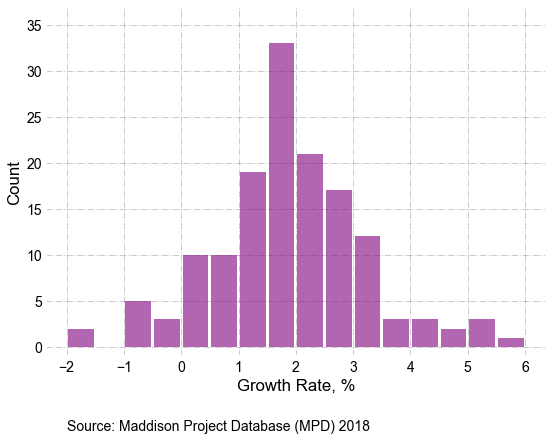

In [47]:
# Plot a histogram of average growth rates from 1960 to 2016
fig,ax=plt.subplots(figsize=(8,6))
df_ = df[df.year==2016]['Avg. Growth (1960-2016)'].dropna()
bins = np.append(np.arange(-2,6,0.5),[6])
sns.distplot(df_,bins=bins,
             ax=ax,color='purple',hist_kws={"rwidth":0.9,'alpha':0.6},kde=False)
ax.set_xlabel('Growth Rate, %')
ax.set_ylabel('Count')
ax.set_ylim(ymin=-1,ymax=37)
ax.text(-2,-9,'Source: Maddison Project Database (MPD) 2018')
plt.savefig('../files/growth-histogram.svg',bbox_inches='tight')

In [48]:
# Summary statistics of average growth rates
desc_2 = df[df.year==2016]['Avg. Growth (1960-2016)'].describe().round(decimals=2).reset_index()
desc_2.rename(columns={'index':'Statistic','cgdppc':'GDP per capita'},inplace=True)

In [49]:
desc_2

,Statistic,Avg. Growth (1960-2016)
0,count,144.00
1,mean,1.90
2,std,1.34
3,min,-1.73
4,25%,1.12
5,50%,1.89
6,75%,2.66
7,max,5.89


In [50]:
# print(tabulate(desc_2, tablefmt="pipe", 
#                showindex=False,headers="keys"))

In [51]:
# Example of countries with high growth rates
miracles = ['HKG','SGP','TWN','KOR']

In [52]:
# create a table of growth miracles in 2016
miracles_table = df[(df.countrycode.isin(miracles))&(df.year==2016)]
miracles_table = (miracles_table[['country','year','cgdppc','GDP per worker','E/pop','Avg. Growth (1960-2016)','Years to double']]
             .rename(columns={'cgdppc':'GDP per capita',
                             'country':'Country',
                             'year':'Year'}).set_index(['Country','Year']))

In [53]:
miracles_table.round(decimals=1)

,,GDP per capita,GDP per worker,E/pop,Avg. Growth (1960-2016),Years to double
Country,Year,,,,,
"China, Hong Kong SAR",2016,47043.0,89121.0,52.8,4.3,16.7
Republic of Korea,2016,36151.0,71246.1,50.7,5.5,13.2
Singapore,2016,67180.0,108866.5,61.7,4.8,14.9
"Taiwan, Province of China",2016,42304.0,84298.5,50.2,5.4,13.2


In [54]:
# print(tabulate(miracles_table.round(decimals=1).reset_index(), tablefmt="pipe", 
#                showindex=False,headers="keys"))

In [55]:
# Examples of countries with low average growth rates, growth disasters
disasters = ['CAF','VEN','HTI','MDG','ZWE']

In [56]:
# Create a table of growth disasters
disasters_table = df[(df.countrycode.isin(disasters))&(df.year==2016)]
disasters_table = (disasters_table[['country','year','cgdppc','GDP per worker','E/pop','Avg. Growth (1960-2016)','Years to double']]
             .rename(columns={'cgdppc':'GDP per capita',
                             'country':'Country',
                             'year':'Year'}).set_index(['Country','Year']))

In [57]:
disasters_table.round(decimals=1)

,,GDP per capita,GDP per worker,E/pop,Avg. Growth (1960-2016),Years to double
Country,Year,,,,,
Central African Republic,2016,619.0,1958.0,31.6,-1.7,-41.5
Haiti,2016,1636.0,4066.2,40.2,-0.7,-107.8
Madagascar,2016,1307.0,2528.6,51.7,-0.9,-80.8
Venezuela (Bolivarian Republic of),2016,13159.0,28878.4,45.6,0.2,375.1
Zimbabwe,2016,1729.0,2845.4,60.8,-0.0,-6205.2


In [58]:
# print(tabulate(disasters_table.round(decimals=1).reset_index(), tablefmt="pipe", 
#                showindex=False,headers="keys"))

### Fact 3: Growth rates are not usually constant over time

In [59]:
df_ = df[df.countrycode=='GBR']

In [60]:
# A function to calculate annual and 10 year rolling window average growh rates
def ave_growth(group):
    x = np.log(group.rgdpnapc.iloc[1:].values)-np.log(group.rgdpnapc.iloc[:-1].values)
    y = group.year.iloc[1:].values-group.year.iloc[:-1].values
    growth = x/y
    years = group.year.iloc[1:].values
    data = pd.DataFrame(data={'Year':years,'Growth Rate':growth})
    ave_growth_ = []
    for year in years:
        data_ = data[(data.Year > year-10) & ((data.Year) <= year)].copy()
        ave_growth_ += [data_['Growth Rate'].mean()]
    data2 = pd.DataFrame(data={'Year':years,'Ave Growth Rate':ave_growth_})
    data = data.merge(data2,on='Year',how='left')
    return data

In [61]:
# Calculate growth rates 
growth_rates = df.groupby(['countrycode','country']).apply(ave_growth)
growth_rates = (growth_rates.reset_index(level=2,drop=True).reset_index().
                set_index(['countrycode','Year']))

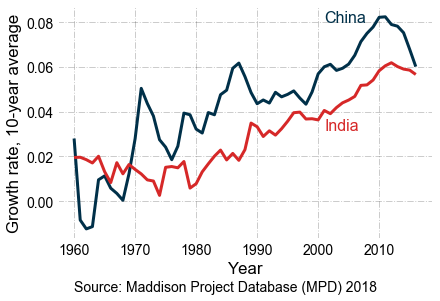

In [62]:
plt.plot(growth_rates.xs('CHN').loc[1960:]['Ave Growth Rate'],label='China')
plt.annotate('China',(2001,0.08),color=colors[1][0],fontsize=16)
plt.plot(growth_rates.xs('IND').loc[1960:]['Ave Growth Rate'],label='India')
plt.annotate('India',(2001,0.032),color=colors[1][1],fontsize=16)
plt.xlabel('Year')
plt.ylabel('Growth rate, 10-year average')
plt.text(1960,-0.04,'Source: Maddison Project Database (MPD) 2018')
plt.savefig('../files/china-india.svg',bbox_inches='tight')

### Fact 4: A country's relative position in the relative income rank may change over time

In [63]:
df_ = df[df.countrycode.isin(['USA','GBR','ARG','HTI']) & (df.year.isin([1870,2016]))
        ].set_index(['countrycode','year'])
df_

country   cgdppc  rgdpnapc      pop         i_cig  \
countrycode year                                                             
ARG         1870       Argentina   2514.0    2578.0    1.796  Extrapolated   
            2016       Argentina  18695.0   18875.0   43.887  Extrapolated   
GBR         1870  United Kingdom   3846.0    5716.0   31.400  Extrapolated   
            2016  United Kingdom  39162.0   37334.0   65.888  Extrapolated   
HTI         1870           Haiti      NaN       NaN    1.150           NaN   
            2016           Haiti   1636.0    1728.0   10.486  Extrapolated   
USA         1870   United States   3736.0    3736.0   40.241  Extrapolated   
            2016   United States  53015.0   53015.0  324.656  Extrapolated   

                 i_bm         emp      E/pop  GDP per worker  \
countrycode year                                               
ARG         1870  NaN         NaN        NaN             NaN   
            2016  NaN   19.683954  44.851446    41682.044931   
GBR         1870  NaN         NaN        NaN             NaN   
            2016  NaN   31.683855  48.087444    81439.138368   
HTI         1870  NaN         NaN        NaN             NaN   
            2016  NaN    4.219000  40.234597     4066.152301   
USA         1870  NaN         NaN        NaN             NaN   
            2016  NaN  152.632553  47.013625   112765.183379   

                  Avg. Growth (1960-2016)  Years to double  
countrycode year                                            
ARG         1870                 1.176846        61.180480  
            2016                 1.176846        61.180480  
GBR         1870                 1.814868        39.672300  
            2016                 1.814868        39.672300  
HTI         1870                -0.668062      -107.774469  
            2016                -0.668062      -107.774469  
USA         1870                 1.923189        37.437809  
            2016                 1.923189        37.437809

In [64]:
value = np.round((df_.xs(['GBR',1870]).cgdppc/
                  df_.xs(['USA',1870]).cgdppc-1)*100,decimals=0).astype(int)
print(f'In 1870 the UK was {value}% richer than the US')

In 1870 the UK was 3% richer than the US


In [65]:
value = np.round((-df_.xs(['GBR',2016]).cgdppc/
                  df_.xs(['USA',2016]).cgdppc+1)*100,decimals=0).astype(int)
print(f'In 2016 the UK was {value}% poorer than the US')

In 2016 the UK was 26% poorer than the US


In [66]:
value = np.round((-df_.xs(['ARG',2016]).cgdppc/
                  df_.xs(['USA',2016]).cgdppc+1)*100,decimals=0).astype(int)
print(f'In 2016 Argentina was {value}% poorer than the US')

In 2016 Argentina was 65% poorer than the US


In [67]:
value = np.round((-df_.xs(['HTI',2016]).cgdppc/
                  df_.xs(['USA',2016]).cgdppc+1)*100,decimals=0).astype(int)
print(f'In 2016 Argentina was {value}% poorer than the US')

In 2016 Argentina was 97% poorer than the US


In [68]:
value = np.round((np.log(df_.xs(['GBR',2016]).rgdpnapc)-
          np.log(df_.xs(['GBR',1870]).rgdpnapc))/(2016-1870)*100,decimals=1)
print(f'The average growth rate of the UK from 1870 to 2016 is {value}%')

The average growth rate of the UK from 1870 to 2016 is 1.3%


In [69]:
value = np.round((np.log(df_.xs(['USA',2016]).rgdpnapc)-
          np.log(df_.xs(['USA',1870]).rgdpnapc))/(2016-1870)*100,decimals=1)
print(f'The average growth rate of the USA from 1870 to 2016 is {value}%')

The average growth rate of the USA from 1870 to 2016 is 1.8%


In [70]:
# Plot GDP per capita of these counties over time
country_list = ['USA','GBR','JPN','KOR','ARG','HTI']

groups = [0,2,4,5,6]

color_codes = dict(zip(country_list,colors[3]))

alphas = dict(zip(country_list,np.ones(len(country_list))))

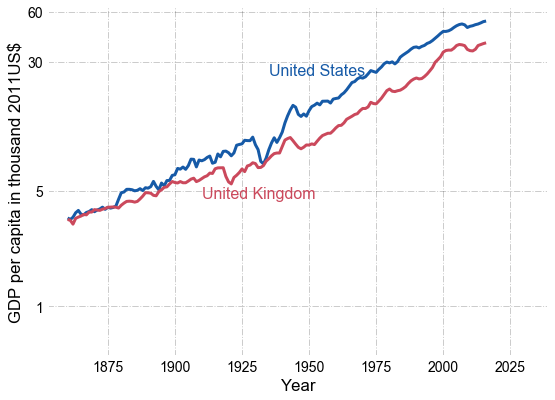

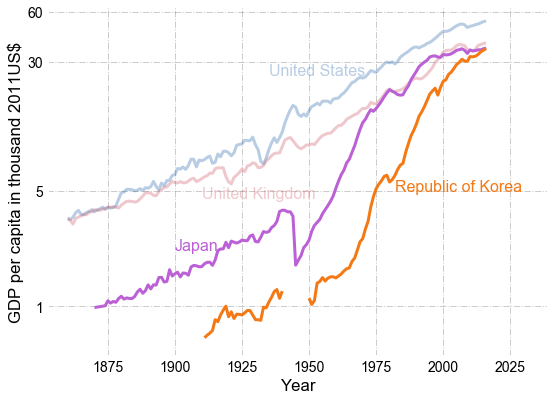

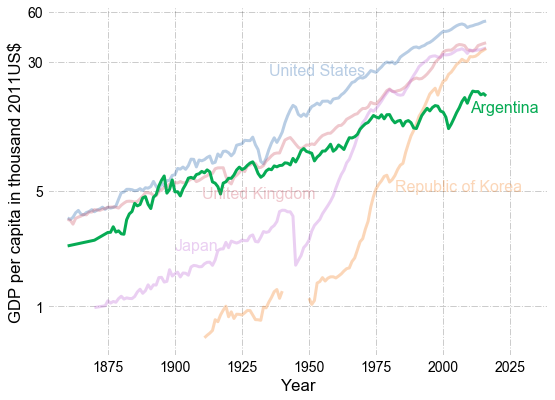

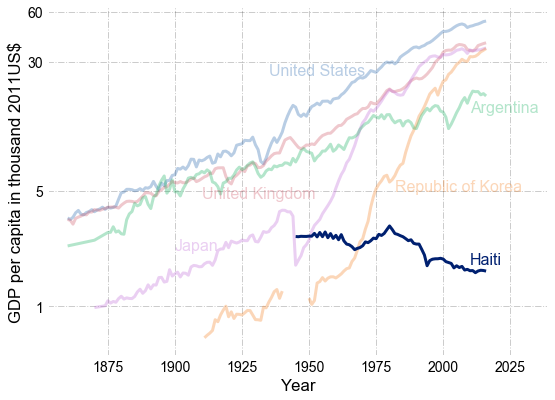

In [71]:
annotate={'USA':(1935,25000),
         'GBR':(1910,4500),
         'JPN':(1900,2200),
         'KOR':(1982,5000),
         'ARG':(2010,15000),
         'HTI':(2010,1800)}
ticks = np.array([.5,1,5,30,60],dtype=int)
for group in groups[1:]:
    fig,ax = plt.subplots(figsize=(8,6))
    file_name = '../files/gdp-per-capita'
    for country in country_list[:group]:
        data = df[(df.countrycode==country) & (df.year>=1860)]
        country_name = data.country.unique()[0]
        ax.plot(data.year,data.cgdppc,color_codes[country],linewidth=3,alpha=alphas[country])
        ax.set_yscale('log')
        ax.set_yticks(ticks*1000)
        ax.set_ylim(ymin=500,ymax=65000)
        ax.set_xlim(xmax=2039)
        ax.set_yticklabels((ticks))
        ax.annotate(country_name,annotate[country],color=color_codes[country],alpha=alphas[country],fontsize=16)
        ax.set_xlabel('Year')
        ax.set_ylabel('GDP per capita in thousand 2011US$')
        file_name += f'_{country}'
        alphas[country]=.3
    plt.savefig(file_name+'.svg',bbox_inches='tight')

### Income per capita of the countries relative to the US

In [72]:
# Focus on two years 1960 and 2016
df_income = df[df.year.isin([1960,2016])][['country','countrycode','year','cgdppc']]

# Transform the table such that incomes 1960 and 2016 are showns as columns
df_income=df_income.pivot_table(index=['country','countrycode'],values='cgdppc',columns=['year'])

# Drop missing observations
df_income.dropna(inplace=True)

In [73]:
# Here is how the table looks like
df_income

,year,1960,2016
country,countrycode,,
Afghanistan,AFG,2744.0,1929.0
Albania,ALB,2142.0,11285.0
Argentina,ARG,8928.0,18695.0
Australia,AUS,15196.0,44783.0
Austria,AUT,8508.0,45010.0
...,...,...,...
Venezuela (Bolivarian Republic of),VEN,5707.0,13159.0
Viet Nam,VNM,1080.0,6031.0
Yemen,YEM,1116.0,2199.0


In [74]:
# Select USA as we will express income per capita relative to the US
USA_income = df_income.xs('USA',level=1)

In [75]:
# Calculate income per capita relative to the US income per capita
df_income[1960]=df_income[1960]/USA_income[1960].values[0]
df_income[2016]=df_income[2016]/USA_income[2016].values[0]

df_income.reset_index(inplace=True)

In [76]:
# Merge relative income data with our original dataset
# we will need population data
df_income=df_income.merge(df[df.year==2016][['countrycode','country','pop']],on=['countrycode','country'],how='left')

df_income.dropna(inplace=True)

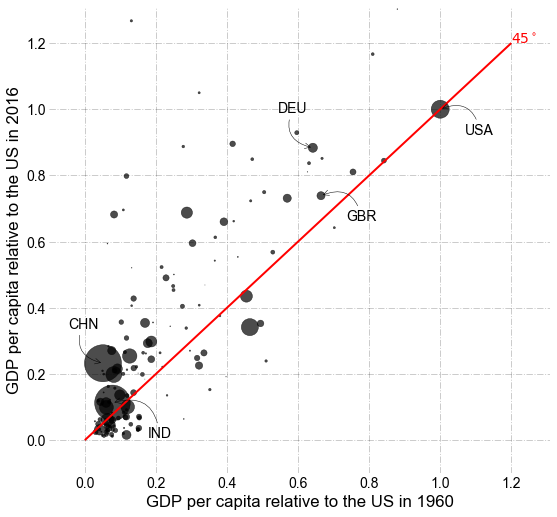

In [77]:
# Scatter plot
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(df_income[1960],df_income[2016],color='k',sizes=df_income['pop'],alpha=.7)
ax.plot(np.linspace(0,1.2),np.linspace(0,1.2),color='r',linewidth=2)
ax.set_xlim(xmin=-0.1,xmax=1.31)
ax.set_ylim(ymin=-0.1,ymax=1.31)
ax.set_xlabel('GDP per capita relative to the US in 1960')
ax.set_ylabel('GDP per capita relative to the US in 2016')
ax.annotate('$45^\circ$',(1.2,1.2),color='r')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
usa_ = df_income[df_income.countrycode=='USA'][[1960,2016]].values[0]
gbr_ = df_income[df_income.countrycode=='GBR'][[1960,2016]].values[0]
chn_ = df_income[df_income.countrycode=='CHN'][[1960,2016]].values[0]
ind_ = df_income[df_income.countrycode=='IND'][[1960,2016]].values[0]
deu_ = df_income[df_income.countrycode=='DEU'][[1960,2016]].values[0]

ax.annotate(
    "USA", xy=(usa_[0],usa_[1]), xycoords="data",
    xytext=(25, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "GBR", xy=(gbr_[0],gbr_[1]), xycoords="data",
    xytext=(25, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "DEU", xy=(deu_[0],deu_[1]), xycoords="data",
    xytext=(-35, 35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "CHN", xy=(chn_[0],chn_[1]), xycoords="data",
    xytext=(-35, 35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "IND", xy=(ind_[0],ind_[1]), xycoords="data",
    xytext=(35, -35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
plt.savefig('../files/scatter-gdp-size.svg',bbox_inches='tight')

In [78]:
# Plot the above graph as an interactive object
import plotly_express as px
import plotly as py
py.offline.init_notebook_mode(connected=True)

In [79]:
data = px.scatter(df_income, x=1960, y=2016,size='pop',
           labels={1960:'GDP per capita relative to the US, 1960',
                  2016:'GDP per capita relative to the US, 2016',
                  'pop':'Population'},hover_name='country',
          width=500,height=500,range_x=(0,1.3),range_y=(0,1.3),
          template='plotly_white')

In [80]:
data

In [81]:
py.offline.plot(data, filename='../files/myplot.html')

'../files/myplot.html'